In [ ]:
# %%bash
# jupyter nbextension install --py --sys-prefix widgetsnbextension
# jupyter nbextension install --py --sys-prefix plotlywidget
# jupyter nbextension enable --py --sys-prefix widgetsnbextension
# jupyter nbextension enable --py --sys-prefix plotlywidget

In [23]:
%%bash 
jupyter nbextension list

Known nbextensions:
  config dir: /Users/lex/.jupyter/nbconfig
    notebook section
      jupyter-js-widgets/extension  enabled 
      plotlywidget/extension  enabled 
  config dir: /Users/lex/anaconda3/etc/jupyter/nbconfig
    notebook section
      jupyter-js-widgets/extension  enabled 
      nb_conda/main  enabled 
    tree section
      nb_conda/tree  enabled 


      - Validating: OK
      - Validating: OK
      - Validating: OK
      - Validating: OK
      - Validating: OK


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
from NetEmbs import *

In [4]:
embs = pd.read_pickle("Simulation_versionMetaDiff_directionCOMBI_walks30_pressure30_window3/TFsteps100000batch64_emb32/cache/Embeddings.pkl")

In [5]:
embs.head(5)

,ID,Emb,GroundTruth
0,8,"[-0.19695708, -0.22684997, 0.115069434, 0.1744...",Sales 21 btw
1,9,"[0.15847915, 0.0964187, -0.09496842, -0.130400...",Cost of Sales
2,10,"[0.21436667, 0.20458017, 0.17234606, -0.244239...",Tax disbursement
3,11,"[0.20547828, 0.18149848, -0.21276833, -0.16709...",Disbursement
4,12,"[0.090881325, 0.045361526, 0.0019204954, 0.262...",Payroll


## Transactional data

In [6]:
d = upload_data("Simulation/FSN_Data.db", limit=None)
d = prepare_data(d)

Original shape of DataFrame is  (61158, 4)
Deleted all NaNs and Strings values from 'Value' column:  (61158, 4)
Before merging FAs columns titles are:  ['ID', 'Name', 'FA_Name', 'Value', 'Debit', 'Credit']
After merging FAs columns titles are:  ['ID', 'FA_Name', 'Credit', 'Debit', 'Name', 'Value']  shape is  (61050, 6)
After normalization shape of DataFrame is  (60740, 7)
Final shape of DataFrame is  (52175, 8)


In [7]:
d.head(10)

,ID,Signature,FA_Name,Credit,Debit,Name,Value,from
0,8,"([('Revenue', 0.82629), ('Tax', 0.17371)], [('...",NoisyRightFA_ilpe,0.000000,0.001441,NoisyRightFA_ilpe_6,0.678201,False
1,8,"([('Revenue', 0.82629), ('Tax', 0.17371)], [('...",NoisyRightFA_jhzg,0.000000,0.003988,NoisyRightFA_jhzg_6,1.877578,False
2,8,"([('Revenue', 0.82629), ('Tax', 0.17371)], [('...",NoisyRightFA_mard,0.000000,0.001110,NoisyRightFA_mard_6,0.522545,False
3,8,"([('Revenue', 0.82629), ('Tax', 0.17371)], [('...",NoisyRightFA_nahl,0.000000,0.002286,NoisyRightFA_nahl_6,1.076345,False
4,8,"([('Revenue', 0.82629), ('Tax', 0.17371)], [('...",NoisyRightFA_oyij,0.000000,0.004095,NoisyRightFA_oyij_6,1.927631,False
5,8,"([('Revenue', 0.82629), ('Tax', 0.17371)], [('...",NoisyRightFA_wpkx,0.000000,0.001024,NoisyRightFA_wpkx_6,0.482056,False
6,8,"([('Revenue', 0.82629), ('Tax', 0.17371)], [('...",NoisyRightFA_zhlc,0.000000,0.001364,NoisyRightFA_zhlc_6,0.641926,False
7,8,"([('Revenue', 0.82629), ('Tax', 0.17371)], [('...",Revenue,0.826287,0.000000,Revenue_6,-389.000000,True
8,8,"([('Revenue', 0.82629), ('Tax', 0.17371)], [('...",Tax,0.173713,0.000000,Tax_6,-81.780718,True
9,8,"([('Revenue', 0.82629), ('Tax', 0.17371)], [('...",TradeReceivables,0.000000,0.984693,TradeReceivables_6,463.574438,False


## Predict cluster's labels

In [8]:
embs = cl_Agglomerative(embs, 8)

First row of Data: 
 [-0.19695708 -0.22684997  0.11506943  0.17442311  0.20106015 -0.13254054
  0.24126534  0.16323344  0.1949625   0.09444448  0.16678071  0.16417685
 -0.12703338  0.15944019 -0.24492544 -0.00580015 -0.07937735 -0.17278388
 -0.07006469  0.32693356 -0.23947953  0.04118197 -0.16536982  0.20513551
  0.17499836 -0.29295653  0.0757151   0.21822007  0.14713573 -0.05681241
 -0.17912321 -0.12949651]


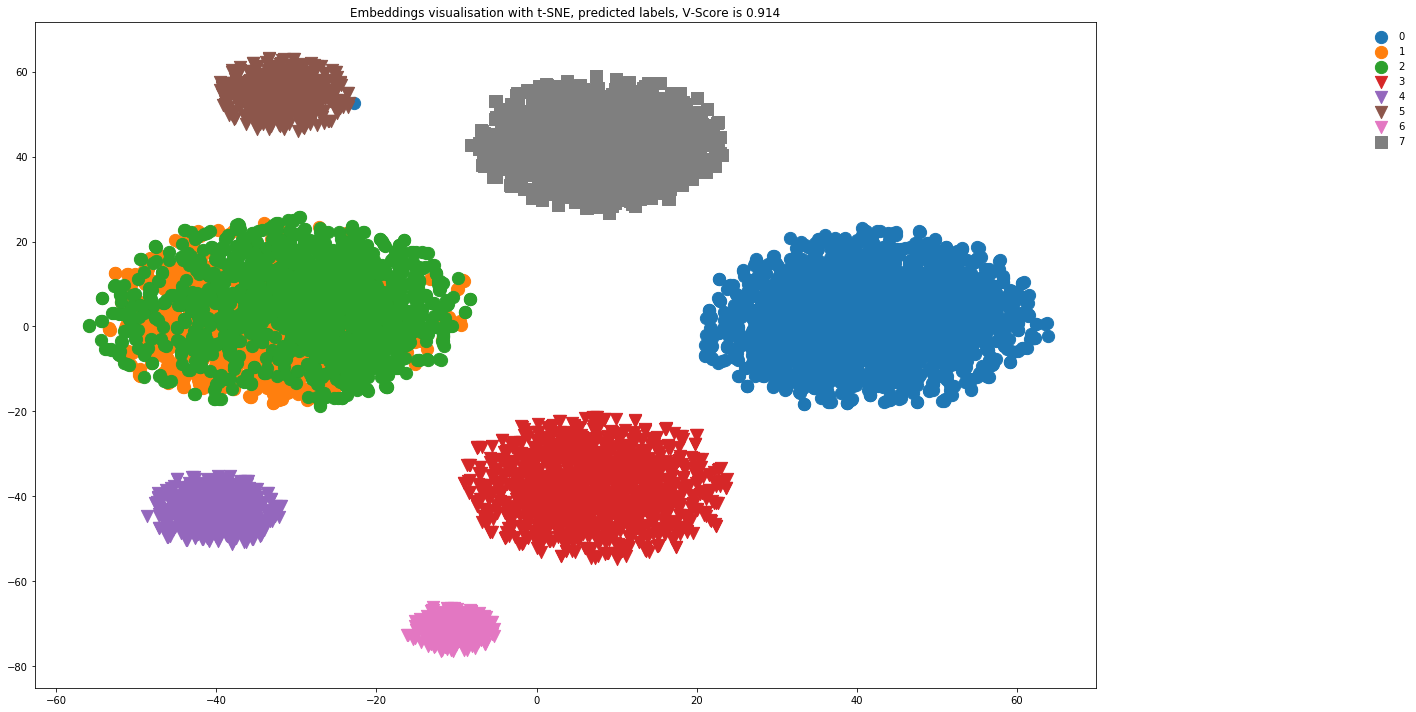

In [9]:
plot_tSNE(embs, legend_title="label")

## Interactive visualization

In [33]:
from __future__ import print_function
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from ipywidgets import interactive, HBox, VBox, widgets

In [11]:
embs.label.iplot(kind='hist', xTitle='Label',
                  yTitle='Count', title='Labels Distribution')

In [12]:
embs.head(5)

,ID,Emb,GroundTruth,label,x,y,true_labels
0,8,"[-0.19695708, -0.22684997, 0.115069434, 0.1744...",Sales 21 btw,2,-13.842628,-3.367294,0
1,9,"[0.15847915, 0.0964187, -0.09496842, -0.130400...",Cost of Sales,0,62.452831,0.478696,1
2,10,"[0.21436667, 0.20458017, 0.17234606, -0.244239...",Tax disbursement,0,-22.818893,52.704872,2
3,11,"[0.20547828, 0.18149848, -0.21276833, -0.16709...",Disbursement,0,31.613670,20.840973,3
4,12,"[0.090881325, 0.045361526, 0.0019204954, 0.262...",Payroll,7,-0.089880,48.601284,4


In [13]:
tab10 = matplotlib.cm.get_cmap("tab10")
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale
markers = ["circle", "diamond", "square"]

In [14]:
data = [go.Scatter(x=embs.x, y=embs.y, mode='markers', marker=dict(color=embs.label, 
                                                                   symbol=embs.label.apply(lambda x: markers[x//10]),
                                                                   colorscale=matplotlib_to_plotly(tab10, 255)))]
iplot(data)

In [117]:
for name, group in embs.groupby(legend_title):
    print(name, group.iloc[0].label//10)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0


In [123]:
f.data

(Scatter({
     'hoverinfo': 'text',
     'marker': {'color': array([2, 0, 0, ..., 7, 7, 5]),
                'colorscale': [[0.0, 'rgb(31, 119, 180)'], [0.003937007874015748,
                               'rgb(31, 119, 180)'], [0.007874015748031496, 'rgb(31,
                               119, 180)'], ..., [0.9921259842519685, 'rgb(23, 190,
                               207)'], [0.9960629921259843, 'rgb(23, 190, 207)'],
                               [1.0, 'rgb(23, 190, 207)']],
                'symbol': array(['circle', 'circle', 'circle', ..., 'circle', 'circle', 'circle'],
                                dtype=object)},
     'mode': 'markers',
     'showlegend': False,
     'text': array(['ID=8,   GroundTruth=Sales 21 btw', 'ID=9,   GroundTruth=Cost of Sales',
                    'ID=10,   GroundTruth=Tax disbursement', ...,
                    'ID=11119,   GroundTruth=Payroll', 'ID=11121,   GroundTruth=Payroll',
                    'ID=11122,   GroundTruth=Fixed Assets'], dtype=

In [128]:
# Scatter plot
legend_title = "label"
markers = ["circle", "diamond", "square"]
f = go.FigureWidget([go.Scatter(x=embs.x, y=embs.y, mode='markers', text=embs.apply(lambda row: f"ID={row.ID},   GroundTruth={row.GroundTruth}", axis=1),
                                showlegend=False,
                                marker=dict(color=embs.label, 
                                            symbol=embs.label.apply(lambda x: markers[x//10]),
                                            colorscale=matplotlib_to_plotly(tab10, 255)))],
    layout = go.Layout(
    hovermode='closest',
    autosize=True,
    width=1000,
    height=700))

scatter = f.data[0]
# Hover text: ID and GroundTruth
scatter.hoverinfo = 'text'

# Label text
description = widgets.Label(
    value=''
)
def printSignature(trace, points, *args):
    print(points)
    row = embs.iloc[points.point_inds[0]]
    description.value = f"ID={row.ID},   GroundTruth={row.GroundTruth}"
scatter.on_hover(printSignature)   
# Selection

VBox([description, f])

    'data': [{'hoverinfo': 'text',
              'marker': {'co…

Points(point_inds=[5211],
       xs=[61.43829345703125],
       ys=[5.631964683532715],
       trace_name='trace 0',
       trace_index=0)
Points(point_inds=[1185],
       xs=[60.98583984375],
       ys=[3.405174493789673],
       trace_name='trace 0',
       trace_index=0)
Points(point_inds=[5211],
       xs=[61.43829345703125],
       ys=[5.631964683532715],
       trace_name='trace 0',
       trace_index=0)
Points(point_inds=[3634],
       xs=[61.28572463989258],
       ys=[-5.129280090332031],
       trace_name='trace 0',
       trace_index=0)
Points(point_inds=[2643],
       xs=[54.502662658691406],
       ys=[-3.9533751010894775],
       trace_name='trace 0',
       trace_index=0)
Points(point_inds=[5488],
       xs=[53.297508239746094],
       ys=[-3.0054471492767334],
       trace_name='trace 0',
       trace_index=0)
Points(point_inds=[2390],
       xs=[59.15740203857422],
       ys=[-8.390594482421875],
       trace_name='trace 0',
       trace_index=0)
Points(point_inds=[640

In [181]:
# Scatter plot
legend_title = "label"
scatter_data = list()
colors = matplotlib_to_plotly(tab10, 10)
markers = ["circle", "diamond", "square"]
for name, group in embs.groupby(legend_title):
    scatter_data.append(go.Scatter(x=group.x, y=group.y, mode='markers', name=name, 
                                text = group.apply(lambda row: f"ID={row.ID},   GroundTruth={row.GroundTruth}", axis=1),
                                customdata = group.index.to_list(),
                                marker=dict(color=group.label.apply(lambda x: colors[x%10][1]), 
                                            symbol=group.label.apply(lambda x: markers[x//10]))))
f = go.FigureWidget(data=scatter_data,
                   layout = go.Layout(
                       hovermode='closest',
    autosize=True,
    width=1000,
    height=700))

scatters = f.data
# Hover text: ID and GroundTruth
for scatter in scatters:
    scatter.hoverinfo = 'text'
    scatter.on_hover(printSignature) 

# Label text
description = widgets.Label(
    value=''
)
def printSignature(trace, points, *args):
    if len(points.point_inds)>0:
        ids = trace.customdata[points.point_inds[0]]
        row = embs.iloc[ids]
        description.value = f"ID={row.ID},   GroundTruth={row.GroundTruth}"
# Selection

VBox([description, f])

    'data': [{'customdata': [1, 2, 3, ..., 6492, 6501, 6508],
 …

In [16]:
# Standard plotly imports
from __future__ import print_function
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import numpy as np

from ipywidgets import interact
fig = go.FigureWidget()
scatt = fig.add_scatter()
xs=np.linspace(0, 6, 100)
@interact(a=(1.0, 4.0, 0.01), b=(0, 10.0, 0.01), color=['red', 'green', 'blue'])
def update(a=3.6, b=4.3, color='blue'):
    with fig.batch_update():
        scatt.x=xs
        scatt.y=np.sin(a*xs-b)
        scatt.line.color=color

fig

interactive(children=(FloatSlider(value=3.6, description='a', max=4.0, min=1.0, step=0.01), FloatSlider(value=…

FigureWidget({
    'data': [{'line': {'color': 'blue'},
              'type': 'scatter',
              'uid': …

In [22]:
import plotly.graph_objs as go

import numpy as np

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        scatter.marker.color = c
        scatter.marker.size = s


scatter.on_click(update_point)

f

FigureWidget({
    'data': [{'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
               …

TypeError: 'int' object is not iterable

TypeError: 'int' object is not iterable